Root Mean Squared Error (RMSE): 332.4464049791164


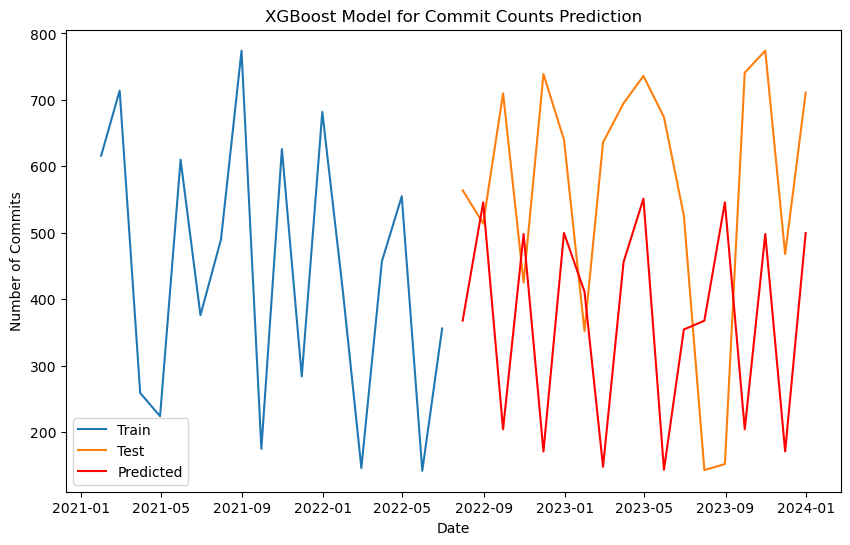

Predicted Commit Counts for December 2024: 499.79974365234375


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

# Sample data creation (replace this with your actual data loading)
date_rng = pd.date_range(start='2021-01-01', end='2023-12-31', freq='M')
commit_counts = np.random.randint(100, 800, size=(len(date_rng)))

commit_df = pd.DataFrame({'commit_date': date_rng, 'commit_count': commit_counts})
commit_df['commit_date'] = pd.to_datetime(commit_df['commit_date'], format='%Y-%m-%d')
commit_df = commit_df.set_index('commit_date')

# Set the frequency of the date index
commit_df = commit_df.asfreq('M')

# Feature Engineering (you may need to add more features based on your dataset)
commit_df['year'] = commit_df.index.year
commit_df['month'] = commit_df.index.month

# Train/test split
train_size = int(len(commit_df) * 0.5)
train, test = commit_df[:train_size], commit_df[train_size:]

# XGBoost model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(train[['year', 'month']], train['commit_count'])

# Predict
predictions = model.predict(test[['year', 'month']])

# Evaluate the model
mse = mean_squared_error(test['commit_count'], predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE): {}".format(rmse))

# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['commit_count'], label='Train')
plt.plot(test.index, test['commit_count'], label='Test')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.title('XGBoost Model for Commit Counts Prediction')
plt.xlabel('Date')
plt.ylabel('Number of Commits')
plt.legend()
plt.show()

# Predict for December 2024
forecast_steps = 12
forecast_dates = pd.date_range(test.index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast_input = pd.DataFrame({'year': forecast_dates.year, 'month': forecast_dates.month})
forecasted_commit_counts = model.predict(forecast_input)

# Print the predicted commit counts for December 2024
print("Predicted Commit Counts for December 2024: {}".format(forecasted_commit_counts[-1]))
